In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r"..\Datasets\milk.csv", index_col=0)

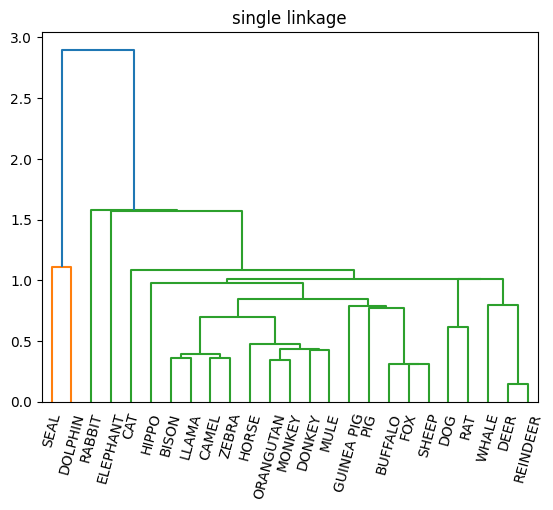

In [40]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

In [41]:
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 3
Best Score: 0.5391595072079531


In [42]:
clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

### Nutrient

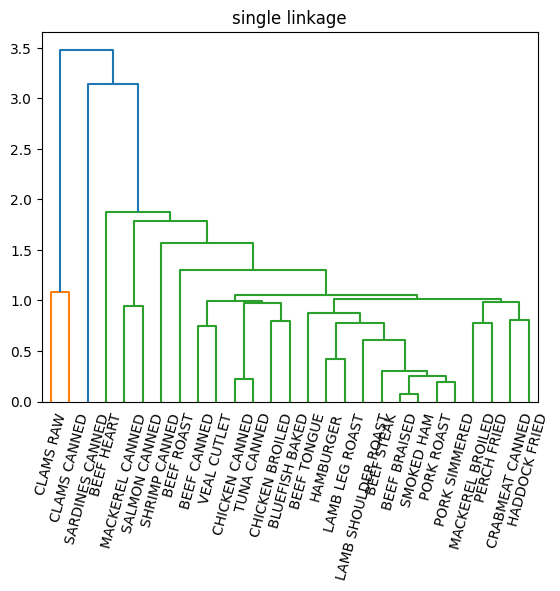

Best no. of clusters: 4
Best Score: 0.41580070002787306


In [68]:
df = pd.read_csv(r"..\Datasets\nutrient.csv", index_col=0)

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

In [44]:
clust = AgglomerativeClustering(n_clusters=4)
clust.fit(df_scaled)

AgglomerativeClustering(n_clusters=4)

In [45]:
from sklearn.decomposition import PCA


print(clust.labels_)

pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 3 0 0]
[4.39264687e+01 2.29177954e+01 1.69542689e+01 1.61694340e+01
 3.20329884e-02]


In [46]:
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

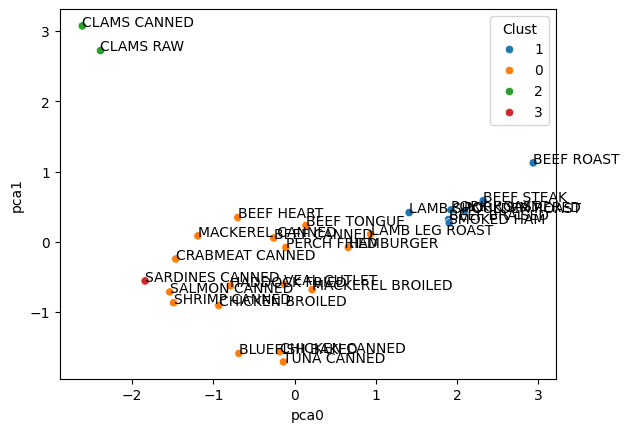

In [47]:
sns.scatterplot(data=principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in np.arange(0, df.shape[0]):
    plt.text(principalComponents.values[i,0],
             principalComponents.values[i,1],
             list(df.index)[i])
plt.show()

In [83]:
from sklearn.cluster import KMeans


Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 2
Best Score: 0.44834235285877894


In [87]:
clust = KMeans(n_clusters=2, random_state=24)
clust.fit(df_scaled)

KMeans(n_clusters=2, random_state=24)

In [88]:
clust_data = df.copy()
clust_data['Clust'] = clust.labels_

clust_data.groupby('Clust').mean()

,energy,protein,fat,calcium,iron
Clust,,,,,
0,219.4,19.8,14.48,41.24,2.116
1,57.5,9.0,1.00,78.00,5.700


### Protein

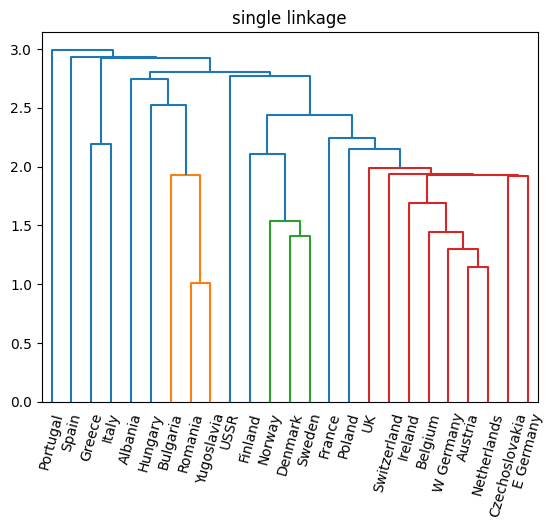

Best no. of clusters: 3
Best Score: 0.32883091422973465


In [48]:
df = pd.read_csv(r"..\Datasets\Protein.csv", index_col=0)

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

In [49]:
clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [50]:
from sklearn.decomposition import PCA


print(clust.labels_)

pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[2 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 1 2 1 0 0 0 0 0 2]
[44.51597304 18.16666052 12.53243894 10.60737739  5.15375995  3.61256635
  3.01784816  1.29213227  1.10124338]


In [51]:
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

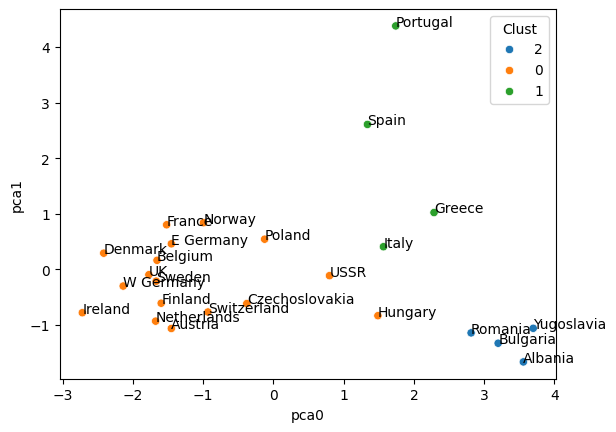

In [52]:
sns.scatterplot(data=principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in np.arange(0, df.shape[0]):
    plt.text(principalComponents.values[i,0],
             principalComponents.values[i,1],
             list(df.index)[i])
plt.show()

### Kmeans

In [53]:
df = pd.read_csv(r"..\Datasets\milk.csv", index_col=0)

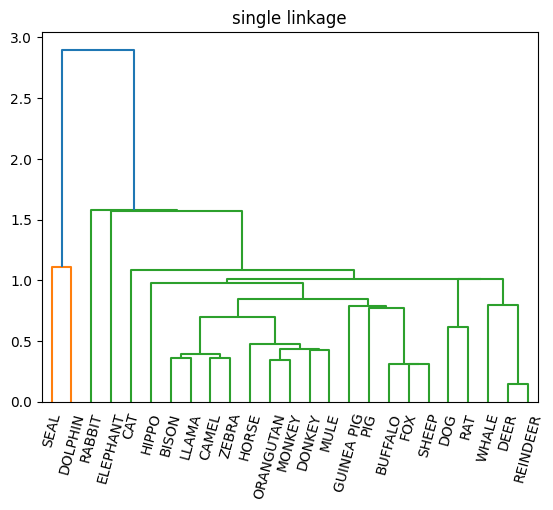

In [54]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.xticks(rotation = 75)
plt.title(link+" linkage")
plt.show()

In [56]:
from sklearn.cluster import KMeans


Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 2
Best Score: 0.5258508931703421


In [60]:
clust = KMeans(n_clusters=2)
clust.fit(df_scaled)

KMeans(n_clusters=2)

In [61]:
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

In [66]:
clust_data = df.copy()
clust_data['Clust'] = clust.labels_

clust_data.groupby('Clust').mean()

,water,protein,fat,lactose,ash
Clust,,,,,
0,85.158824,4.235294,4.964706,5.147059,0.635294
1,63.362500,10.412500,21.662500,1.975000,1.347500


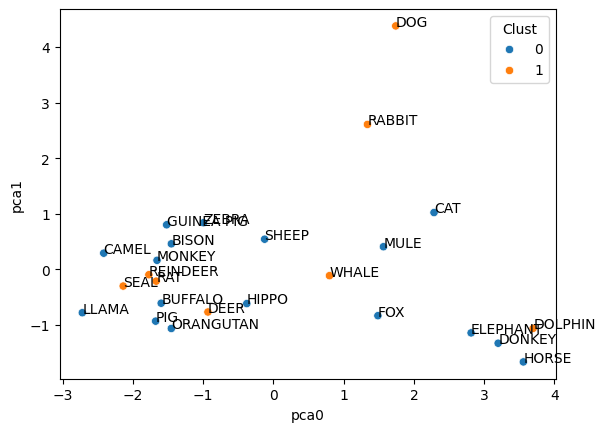

In [67]:
sns.scatterplot(data=principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in np.arange(0, df.shape[0]):
    plt.text(principalComponents.values[i,0],
             principalComponents.values[i,1],
             list(df.index)[i])
plt.show()